In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import pyaudio
import pprint

In [4]:
import pyaudio
p = pyaudio.PyAudio()
info = p.get_host_api_info_by_index(0)
num_devices = info.get('deviceCount')
for i in range(0, num_devices):
        if (p.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
            print( "Input Device id ", i, " - ", p.get_device_info_by_host_api_device_index(0, i).get('name'))

Input Device id  0  -  Microsoft Sound Mapper - Input
Input Device id  1  -  Microphone Array (Realtek High 
Input Device id  2  -  Headset (ThisBeBose Hands-Free 


In [5]:
info = p.get_host_api_info_by_index(0)


In [6]:
num_devices = info.get('deviceCount')
for device_id in range(num_devices):
    device = p.get_device_info_by_host_api_device_index(0,device_id)
#     pprint.pprint(device)
    if device.get('maxOutputChannels') > 0:
        print(device.get('name'),device.get('index'))
        print("OUTPUT!")
print(device.keys())

Microsoft Sound Mapper - Output 3
OUTPUT!
Headphones (ThisBeBose Stereo) 4
OUTPUT!
Headset (ThisBeBose Hands-Free  5
OUTPUT!
Speakers (Realtek High Definiti 6
OUTPUT!
Speakers (Cypress Digital Audio 7
OUTPUT!
dict_keys(['index', 'structVersion', 'name', 'hostApi', 'maxInputChannels', 'maxOutputChannels', 'defaultLowInputLatency', 'defaultLowOutputLatency', 'defaultHighInputLatency', 'defaultHighOutputLatency', 'defaultSampleRate'])


In [7]:
p.get_default_output_device_info()

{'index': 4,
 'structVersion': 2,
 'name': 'Headphones (ThisBeBose Stereo)',
 'hostApi': 0,
 'maxInputChannels': 0,
 'maxOutputChannels': 2,
 'defaultLowInputLatency': 0.09,
 'defaultLowOutputLatency': 0.09,
 'defaultHighInputLatency': 0.18,
 'defaultHighOutputLatency': 0.18,
 'defaultSampleRate': 44100.0}

In [8]:
info

{'index': 0,
 'structVersion': 1,
 'type': 2,
 'name': 'MME',
 'deviceCount': 8,
 'defaultInputDevice': 1,
 'defaultOutputDevice': 4}

In [9]:
p = pyaudio.PyAudio()
info = p.get_host_api_info_by_index(0)
num_devices = info.get('deviceCount')
for device_id in range(num_devices):
    device = p.get_device_info_by_host_api_device_index(0,device_id)
    print(device)
    
p.terminate()


{'index': 0, 'structVersion': 2, 'name': 'Microsoft Sound Mapper - Input', 'hostApi': 0, 'maxInputChannels': 2, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}
{'index': 1, 'structVersion': 2, 'name': 'Microphone Array (Realtek High ', 'hostApi': 0, 'maxInputChannels': 2, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}
{'index': 2, 'structVersion': 2, 'name': 'Headset (ThisBeBose Hands-Free ', 'hostApi': 0, 'maxInputChannels': 1, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.09, 'defaultLowOutputLatency': 0.09, 'defaultHighInputLatency': 0.18, 'defaultHighOutputLatency': 0.18, 'defaultSampleRate': 44100.0}
{'index': 3, 'structVersion': 2, 'name': 'Microsoft Sound Mapper - Output', 'hostApi': 0, 'maxInputChann

In [10]:


def window_easing(n, easing=None):
    """
    n - int, window size
    easing - int, samples to attenuate at edges with sine"""
    if easing is None:
        easing = np.int(np.floor(n/2))
    
    assert easing <= n/2, "easing must be less than half the window size"
    window = np.ones(n)
    if easing>0:
        #window[:easing] = np.sin(2*np.pi*(np.arange(easing)/(2*easing)-1/4))/2+0.5
        #window[-easing:] = np.sin(2*np.pi*(np.arange(easing)/(2*easing)+1/4))/2+0.5
        window[:easing] = np.linspace(0,1,easing, endpoint=True)
        window[-easing:] = np.flip(window[:easing])
    return window


In [24]:
import pyaudio



def array2audio(note,max_amplitude=2):
    # Ensure that highest value is in 16-bit range
    audio = note * (2**15 - 1) / max_amplitude
    # Convert to 16-bit data
    audio = audio.astype(np.int16)
    return audio


fs_audio = 8192

N_audio_segment = 1024*2
CHUNK = N_audio_segment
WIDTH = 2
CHANNELS = 1
RATE = fs_audio
RECORD_SECONDS = 2
FORMAT = pyaudio.paInt16

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=False,
                output=True,
                frames_per_buffer=CHUNK)

#     t_frame = np.linspace(0, N_audio_segment/fs_audio, fs_audio)
t_frame = np.linspace(0, N_audio_segment/fs_audio, N_audio_segment, endpoint=False)
sig_frame = np.sin(2*np.pi*(256)*t_frame)
data = array2audio(sig_frame[:])
# data = np.tile(data,2)

print(data[:2], data[:-2])
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):


    
    
    stream.write(data, CHUNK,exception_on_underflow=True)

    
    

print("* done")

stream.stop_stream()
stream.close()

p.terminate()

[   0 3196] [     0   3196   6269 ... -13622 -11584  -9102]
* done


## Audio with a single generated fft tone and velocity

In [544]:
import math
def round_up_to_even(f):
    return math.ceil(f / 2.) * 2

fs_audio = 8192

N_audio_segment = 1024

CHUNK = N_audio_segment
WIDTH = 2
CHANNELS = 1
RATE = fs_audio
RECORD_SECONDS = 3
FORMAT = pyaudio.paInt16

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=False,
                output=True,
                frames_per_buffer=CHUNK)

#     t_frame = np.linspace(0, N_audio_segment/fs_audio, fs_audio)
t_frame = np.linspace(0, N_audio_segment/fs_audio, N_audio_segment, endpoint=False)
sig_frame = np.sin(2*np.pi*(256)*t_frame)
data = array2audio(sig_frame[:])

data = array2audio(sig_spatial)

data = array2audio(sig)
data = array2audio(sig2)
# data = np.tile(data,2)


fs_texture = 1024
velocity = 3
N_texture = 1024

N_audio_segment = 512*1
N_audio_segment = np.int(fs_audio/(fs_texture*velocity)*N_texture)
N_audio_segment = round_up_to_even(N_audio_segment)
print("audio", fs_audio, "fstexture", fs_texture, "velocity", velocity, "\nN_texture", N_texture, "N_audio_segment",N_audio_segment)
# print(data[:2], data[:-2])
for i in range(0, int(RATE / N_audio_segment * RECORD_SECONDS)):


#         N_texture = 3500

        f = 127
        x = np.arange(N_texture)
        
        sig = np.sin(2*np.pi*f*5*x/N_texture)
#         sig = sig+np.sin(2*np.pi*f*2*x/N_texture)
        
    
        t = np.linspace(0, N_texture/fs_texture, N_texture, endpoint=False)
        sig = np.sin(2*np.pi*f*t)

        ftsig = np.fft.fft(sig)

#         velocity = i+1
        N_audio_segment = np.int(fs_audio/(fs_texture*velocity)*N_texture)
        N_audio_segment = round_up_to_even(N_audio_segment)
        
        sig2 = np.fft.ifft(ftsig)
        
        sig2 = signal.resample(sig2, N_audio_segment)
        
#         N_audio_segment = np.int(N_audio_segment/2)
        sig2 = sig2[:N_audio_segment]

        data = array2audio(sig)
        data = array2audio(sig2)

        stream.write(data, N_audio_segment,exception_on_underflow=True)

    
    

print("* done")

stream.stop_stream()
stream.close()

p.terminate()

audio 8192 fstexture 1024 velocity 3 
N_texture 1024 N_audio_segment 2730
* done


C:\Users\diogo\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(890.0, 900.0)

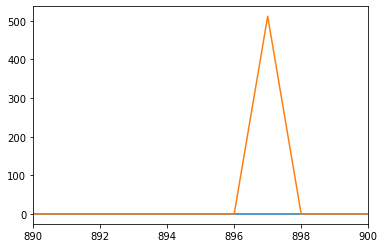

In [224]:
plt.plot(ftsig)
plt.plot(np.abs(ftsig))

plt.xlim(890,900)


### generating audio from textures

17408


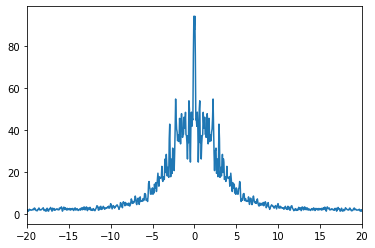

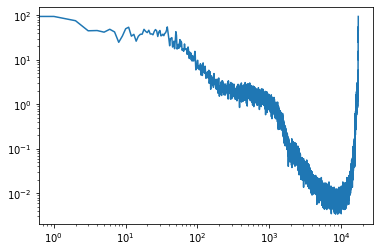

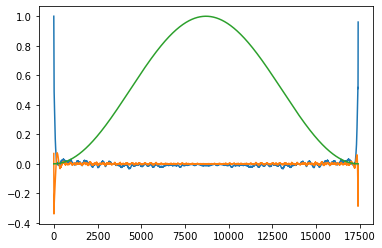

In [491]:
filename = "textures\PP\MT-11020\MT-11020_spectrum.txt"
filename = "textures\\ABS\\MT-11030\\MT-11030_spectrum.txt"
filename = "textures\\PP\\MT-11020\\MT-11020_spectrum.txt"
filename = "textures\\ABS\\MT-11020\\MT-11020_spectrum.txt"

freqs, spectrum = np.loadtxt(filename, delimiter=',', unpack=True)
fs_texture = 1024



# spectrum = np.power(spectrum, 1)

# spectrum = spectrum/np.max(spectrum)
# spectrum[np.int(spectrum.size/2)] =0


# spectrum = sig-np.min(spectrum)
# spectrum = sig/np.ptp(spectrum)
plt.plot(freqs,spectrum, '-')
# remake the spectrum

# plt.xlim(8500,9500)

# spectrum = spectrum[:np.int(spectrum.size/2)]
# spectrum = np.concatenate([spectrum, np.flip(spectrum)])
# plt.plot(spectrum, '.')
# plt.xlim(8000,9000)
plt.xlim(-20,20)
spectrum = np.fft.fftshift(spectrum)

plt.figure()
# plt.plot(spectrum)
plt.loglog(spectrum)

# plt.xlim(-50,100)

sig = np.fft.ifft(spectrum).real
# plt.plot(np.fft.fftshift(spectrum), '-')

window = window_easing(sig.size, 512)
window = np.blackman(sig.size)
window = np.hanning(sig.size)

# sig = sig*window
sig = signal.detrend(sig)
sig = sig-np.mean(sig)

sig = sig/np.max(sig)

plt.figure()
plt.plot(sig)


cutoff = 3
sig = butter_highpass_filter(sig, cutoff, fs_texture, order=5)
cutoff = 200
# sig = butter_lowpass_filter(sig, cutoff, fs_texture, order=5)


plt.plot(sig)

# plt.plot(np.concatenate([sig, sig,sig,sig]),'.')

plt.plot(window)
print(spectrum.size)
# plt.xlim(-100,100)


# sig2 = np.abs(sig)

# sig2 = np.clip(sig2, a_min=0.2,a_max=1)
# plt.plot(sig2, '.')

# plt.figure()


# ftsig2 = np.fft.fft(sig2)
# ftsig2[0]=0
# plt.plot(ftsig2 ,'.')

In [355]:
# gauss = signal.gaussian(spectrum.size, 64, sym=False)
# spectrum = np.fft.fftshift(gauss)
# plt.plot(spectrum)

In [356]:
p.terminate()

C:\Users\diogo\INL\ProTouch - Documents\Develop\VibrationActuator\Code\texture_vibration_generator\texture_vibration_generator.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  audio = audio.astype(np.int16)


audio 8192 fstexture 1024 velocity 30 
N_texture 17408 N_audio_segment 4642
audio 8192 fstexture 1024 velocity 35 
N_texture 17408 N_audio_segment 1024 ptp data 12999
audio 8192 fstexture 1024 velocity 40 
N_texture 17408 N_audio_segment 1024 ptp data 13003
audio 8192 fstexture 1024 velocity 45 
N_texture 17408 N_audio_segment 1024 ptp data 13021
audio 8192 fstexture 1024 velocity 50 
N_texture 17408 N_audio_segment 1024 ptp data 12990
audio 8192 fstexture 1024 velocity 55 
N_texture 17408 N_audio_segment 1024 ptp data 12968
audio 8192 fstexture 1024 velocity 60 
N_texture 17408 N_audio_segment 1024 ptp data 13110
audio 8192 fstexture 1024 velocity 65 
N_texture 17408 N_audio_segment 1024 ptp data 12979
audio 8192 fstexture 1024 velocity 70 
N_texture 17408 N_audio_segment 1024 ptp data 12987
audio 8192 fstexture 1024 velocity 75 
N_texture 17408 N_audio_segment 1024 ptp data 12995
audio 8192 fstexture 1024 velocity 80 
N_texture 17408 N_audio_segment 1024 ptp data 12927
audio 8192 fst

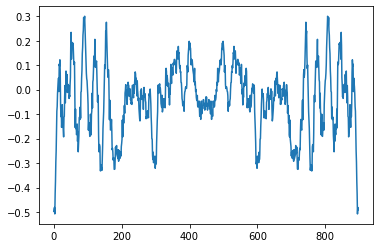

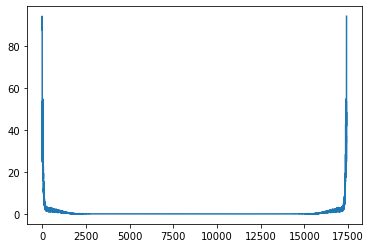

In [547]:

fs_audio = 8192*1

N_audio_segment = 1024

CHUNK = N_audio_segment
WIDTH = 2
CHANNELS = 1
RATE = fs_audio
RECORD_SECONDS = 10
FORMAT = pyaudio.paInt16

p.terminate()
p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=False,
                output=True,
                frames_per_buffer=CHUNK)

#     t_frame = np.linspace(0, N_audio_segment/fs_audio, fs_audio)
t_frame = np.linspace(0, N_audio_segment/fs_audio, N_audio_segment, endpoint=False)
sig_frame = np.sin(2*np.pi*(256)*t_frame)
data = array2audio(sig_frame[:])

data = array2audio(sig_spatial)

data = array2audio(sig)
data = array2audio(sig2)
# data = np.tile(data,2)


fs_texture = 1024
velocity = 30
N_texture = spectrum.size



def signal_from_spectrum(spectrum, N_trim=256):

    sig = np.fft.ifft(spectrum)

    N_sig = sig.size

    if N_sig > 2*N_trim:

        sig = sig[N_trim:N_sig-N_trim]
    return sig



window = window_easing(N_texture, 512)

N_audio_segment = 512*1
N_audio_segment = np.int(fs_audio/(fs_texture*velocity)*N_texture)
N_audio_segment = round_up_to_even(N_audio_segment)
print("audio", fs_audio, "fstexture", fs_texture, "velocity", velocity, "\nN_texture", N_texture, "N_audio_segment",N_audio_segment)

oddflip = 0
# for i in range(0, int(RATE / N_audio_segment * RECORD_SECONDS)):
for i in range(0, 25):


    
        velocity = velocity+5
        
        
        for j in range(4):

            sig2 = signal_from_spectrum(spectrum, N_trim=np.int(N_texture/4))
            
            
            # Cut the corners of sig2..
            N_audio_segment = sig2.size

            
            N_audio_segment = np.int(fs_audio/(fs_texture*velocity)*N_texture)
            N_audio_segment = round_up_to_even(N_audio_segment)

            sig2 = signal.resample(sig2, N_audio_segment)
            
            # make a CHUNK of 1024
            if N_audio_segment > CHUNK:
                sig2 = sig2[:np.int(CHUNK/2)]
                sig2 = np.concatenate([sig2, np.flip(sig2)])

#             if oddflip:
#                 sig2 = np.flip(sig2)
#                 oddflip = 0
#             else:
#                 oddflip = 1
                
#             cutoff = 50
#             sig2 = butter_highpass_filter(sig2, cutoff, fs_audio, order=3)


#             N_audio_segment = np.int(N_audio_segment/2)
#             sig2 = sig2[:N_audio_segment]

#             sig2 = sig2[np.int(N_audio_segment*3/8):np.int(N_audio_segment*5/8)]
    
    
            # Trim sig2 to a CHUNK in the middle..
        
            N_audio_segment = sig2.size
            
        
    
            N_audio_segment = sig2.size
    #         plt.plot(sig2.real)
            sig2 = sig2/np.max(sig2)*0.3

            data = array2audio(sig2.real)
            frames_available = stream.get_write_available()
            output_latency = stream.get_output_latency()

            stream.write(data, N_audio_segment,exception_on_underflow=True)
#             print("Write available %d, latency %f"%(frames_available,output_latency))
        print("audio", fs_audio, "fstexture", fs_texture, "velocity", velocity,
              "\nN_texture", N_texture, "N_audio_segment",N_audio_segment,
                "ptp data",np.ptp(data))

        
#         break

print("* done")

plt.plot(sig2.real)
plt.figure()
plt.plot(spectrum)

stream.stop_stream()
stream.close()

p.terminate()

## Pink noise generator and modeller

C:\Users\diogo\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


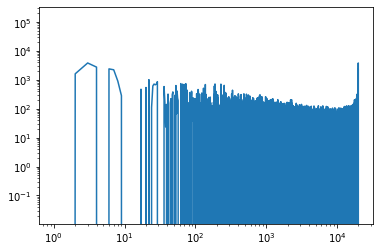

In [494]:
import pandas as pd

def voss(nrows, ncols=16):
    """Generates pink noise using the Voss-McCartney algorithm.
    
    nrows: number of values to generate
    rcols: number of random sources to add
    
    returns: NumPy array
    """
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    # the total number of changes is nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

noise = voss(20000)
ftnoise = np.fft.fft(noise)


plt.loglog(ftnoise)

In [325]:
list(range(0))

[]

In [314]:
np.ptp(freqs)

1023.0

C:\Users\diogo\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\diogo\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


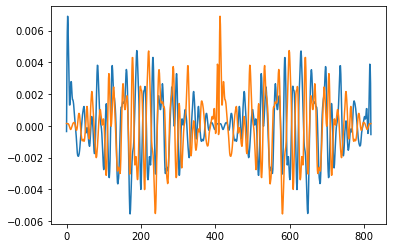

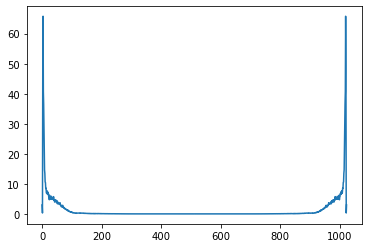

In [241]:
plt.plot(sig2)
plt.plot(np.fft.fftshift(sig2))
plt.figure()
plt.plot(spectrum)

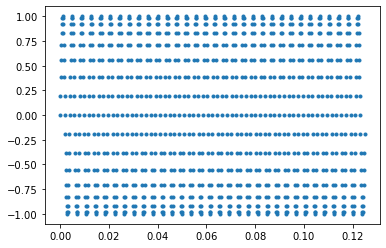

In [166]:
cdata = np.concatenate([data, data])


plt.plot(t_frame, sig_frame, '.')

In [25]:
from texture_vibration_generator import *


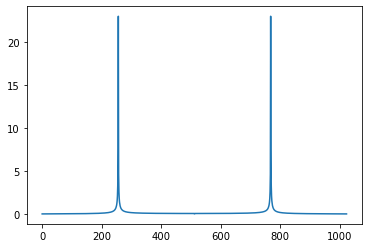

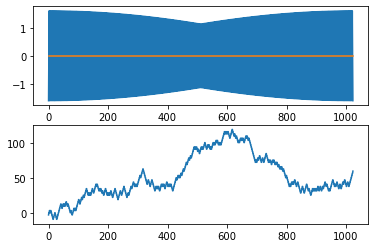

In [61]:
wavelength_texture = 1/128
length_texture = 1
N_texture = 1024

spectrum_texture, fs_spatial = create_spectrum_texture(wavelength_texture, length_texture, N_texture, velocity_probe=1)

plt.plot(np.abs(spectrum_texture))


sig_spatial = generate_audio_from_spectrum(spectrum_texture, N_output=None)


fig, axes = plt.subplots(2,1)
plt.sca(axes[0])
plt.plot(sig_spatial.real, '-')
plt.plot(sig_spatial.imag, '-')
plt.sca(axes[1])
plt.plot(np.unwrap(np.angle(sig_spatial)), '-')

C:\Users\diogo\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


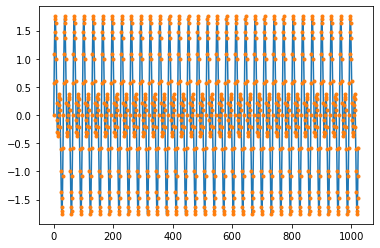

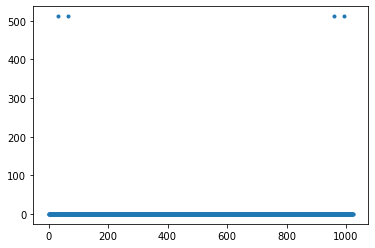

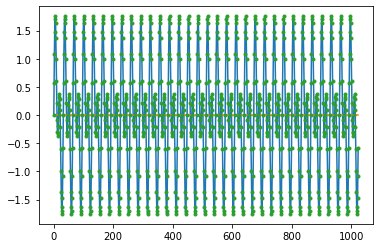

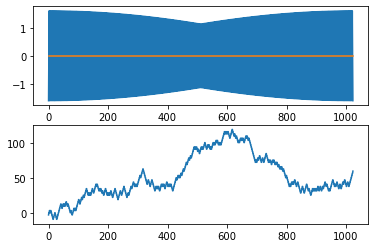

In [85]:
wavelength_texture = 1/128
length_texture = 1
N_texture = 1024


f = 32
x = np.arange(N_texture)

sig = np.sin(2*np.pi*f*x/N_texture)
sig = sig+np.sin(2*np.pi*f*2*x/N_texture)
plt.plot(sig)
plt.plot(sig, '.')

ftsig = np.fft.fft(sig)

plt.figure()
plt.plot(np.abs(ftsig), '.')

# plt.xlim(0,60)

# reverse ifft

sig2 = np.fft.ifft(ftsig)

plt.figure()
plt.plot(sig2.real)
plt.plot(sig2.imag)
plt.plot(sig2, '.')


# spectrum_texture, fs_spatial = create_spectrum_texture(wavelength_texture, length_texture, N_texture, velocity_probe=1)

# plt.plot(np.abs(spectrum_texture))


sig_spatial = generate_audio_from_spectrum(spectrum_texture, N_output=None)


fig, axes = plt.subplots(2,1)
plt.sca(axes[0])
plt.plot(sig_spatial.real, '-')
plt.plot(sig_spatial.imag, '-')
plt.sca(axes[1])
plt.plot(np.unwrap(np.angle(sig_spatial)), '-')

In [86]:
sig,sig2

(array([ 0.        ,  0.57777375,  1.08979021, ..., -1.47944977,
        -1.08979021, -0.57777375]),
 array([-3.15544362e-30-1.11022302e-16j,  5.77773754e-01-5.55111512e-17j,
         1.08979021e+00+1.11022302e-16j, ...,
        -1.47944977e+00+2.48984223e-30j, -1.08979021e+00+1.11022302e-16j,
        -5.77773754e-01+1.20794326e-30j]))

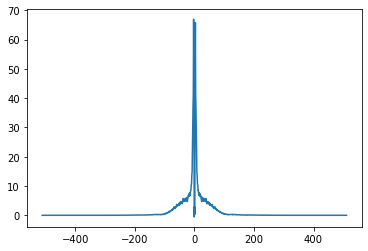

In [157]:
filename = "textures\PP\MT-11020\MT-11020_spectrum.txt"

freqs, spectrum = np.loadtxt(filename, delimiter=',', unpack=True)

plt.plot(freqs,spectrum)

In [153]:
fs_audio = 8192

N_audio_segment = 1024

CHUNK = N_audio_segment
WIDTH = 2
CHANNELS = 1
RATE = fs_audio
RECORD_SECONDS = 2
FORMAT = pyaudio.paInt16

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=False,
                output=True,
                frames_per_buffer=CHUNK)

#     t_frame = np.linspace(0, N_audio_segment/fs_audio, fs_audio)
t_frame = np.linspace(0, N_audio_segment/fs_audio, N_audio_segment, endpoint=False)
sig_frame = np.sin(2*np.pi*(256)*t_frame)
data = array2audio(sig_frame[:])

data = array2audio(sig_spatial)

data = array2audio(sig)
data = array2audio(sig2)
# data = np.tile(data,2)


fs_texture = 1024
velocity = 3
N_texture = 1024*1

N_audio_segment = 512*1
N_audio_segment = np.int(fs_audio/(fs_texture*velocity)*N_texture)
print("audio", fs_audio, "fstexture", fs_texture, "velocity", velocity, "\nN_texture", N_texture, "N_audio_segment",N_audio_segment)
# print(data[:2], data[:-2])
for i in range(0, int(RATE / N_audio_segment * RECORD_SECONDS)):


#         N_texture = 3500

        f = 256
        x = np.arange(N_texture)
        
        sig = np.sin(2*np.pi*f*5*x/N_texture)
#         sig = sig+np.sin(2*np.pi*f*2*x/N_texture)
        
    
        t = np.linspace(0, N_texture/fs_texture, N_texture, endpoint=False)
        sig = np.sin(2*np.pi*f*t)

        ftsig = np.fft.fft(sig)



        sig2 = np.fft.ifft(ftsig)
        
        sig2 = signal.resample(sig2, N_audio_segment)

        data = array2audio(sig)
        data = array2audio(sig2)

        stream.write(data, N_audio_segment,exception_on_underflow=True)

    
    

print("* done")

stream.stop_stream()
stream.close()

p.terminate()

audio 8192 fstexture 1024 velocity 3 
N_texture 1024 N_audio_segment 2730
* done


C:\Users\diogo\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


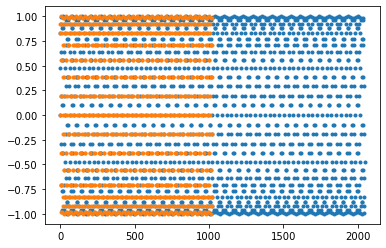

In [117]:
plt.plot(sig, '.')
plt.plot(sig2, '.')

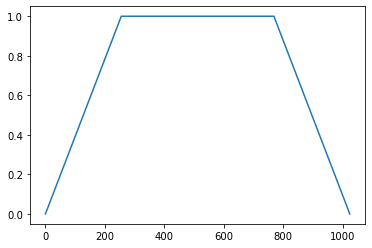

In [13]:
win = window_easing(1024, 256)
plt.plot(win)

In [58]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day1"

sample ="MT-11020"
path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day4\\ABS\\MT-11050"
path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day4\\ABS\\%s"%(sample)
path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day4\\ABS\\"
path = "textures\\ABS\\"

directories = os.listdir(path)

print(directories)
directories = [file for file in directories if os.path.isdir(os.path.join(path,file))]
print(directories)

sample_names = directories


# for path_name in [os.path.join(path, sample) for sample in sample_names]:

for sample in sample_names:
    path_name = os.path.join(path, sample) 
    print(sample, path_name)
    
    # listing all profile names inside
    files = os.listdir(path_name)
    
    
    # select the proper extension
    files = [file for file in files if ".ua2" in file]
    print(files)
    
    
    fig, ax = plt.subplots(1,2, figsize=(15,4))

    for file in files:
        filename = os.path.join(path_name, file)
#         print(filename)
        
        # load the resolution:
        with open(filename, "r") as f:
            line = f.readline()
            if "Profil" not in line:
                break
            else:
                line = f.readline()
                
                # Read the x-length and x-resolution
                # example line: X-Maß = 17.50 X-Auflösung = 1000.00 Punkte/Zeile: 17501
                data = re.findall(r"[-+]?\d*\.\d+|\d+", line)
#                 print(line)
                x_length, x_resolution, x_total = [float(value) for value in data]
                print(file, x_length, x_resolution, x_total)
        
        # Load all the profile data and construct the x and y topography
        profile = np.loadtxt(filename, skiprows=2)
        
        assert profile.size == x_total, "Confirm that the profile size is the same as the extracted x_total in the .ua2 header"
        x = np.linspace(0,x_length, profile.size)
        
        # Detrend the profile lienarly
        profile = signal.detrend(profile, type='linear')

        spectrum_profile = np.fft.fft(profile-np.mean(profile))

        spectrum_spatial_freq = np.fft.fftfreq(spectrum_profile.size, d=np.diff(x)[0])

        spectrum_texture = spectrum_profile
        spectrum_profile = np.abs(spectrum_profile)

        spectrum_profile = np.fft.fftshift(spectrum_profile)
        spectrum_spatial_freq = np.fft.fftshift(spectrum_spatial_freq)


        posfilename = os.path.splitext(file)[0]

        plt.sca(ax[0])

        plt.plot(x, profile, label=sample)
        plt.xlabel("x [mm]")
        plt.ylabel("Texture morphology [a.u.]")

        plt.legend()
        plt.sca(ax[1])

#         plt.plot(spectrum_spatial_freq, spectrum_profile/spectrum_profile.max(), label=sample)
        plt.plot(spectrum_spatial_freq, spectrum_profile, label=sample)
        plt.legend()

        plt.xlabel("k [1/mm]")
        plt.ylabel("Spectrum amplitude")
        plt.xlim(0,10)
        
      
        
        
        
        print("done", output_filename)
    outputname = "%s_spectrum.png"%(sample)
    output_filename = os.path.join(path_name, outputname)
    plt.savefig(output_filename)
    plt.close()
    break

['MT-11020', 'MT-11030', 'MT-11040', 'MT-11050', 'MT-11100', 'MT-11110', 'MT-11120', 'MT-11150', 'MT-11160']
['MT-11020', 'MT-11030', 'MT-11040', 'MT-11050', 'MT-11100', 'MT-11110', 'MT-11120', 'MT-11150', 'MT-11160']
MT-11020 textures\ABS\MT-11020
['Pos01.ua2', 'Pos02.ua2', 'Pos03.ua2', 'Pos04.ua2', 'Pos05.ua2', 'Pos06.ua2']
Pos01.ua2 17.5 1000.0 17501.0
done textures\ABS\MT-11020\MT-11020_spectrum.png
Pos02.ua2 17.5 1000.0 17501.0
done textures\ABS\MT-11020\MT-11020_spectrum.png
Pos03.ua2 17.5 1000.0 17501.0
done textures\ABS\MT-11020\MT-11020_spectrum.png
Pos04.ua2 17.5 1000.0 17501.0
done textures\ABS\MT-11020\MT-11020_spectrum.png
Pos05.ua2 17.5 1000.0 17501.0
done textures\ABS\MT-11020\MT-11020_spectrum.png
Pos06.ua2 17.5 1000.0 17501.0
done textures\ABS\MT-11020\MT-11020_spectrum.png


In [56]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day1"

sample ="MT-11020"
path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day4\\ABS\\MT-11050"
path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day4\\ABS\\%s"%(sample)
path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day4\\ABS\\"
path = "textures\\ABS\\"

directories = os.listdir(path)

print(directories)
directories = [file for file in directories if os.path.isdir(os.path.join(path,file))]
print(directories)

sample_names = directories


# for path_name in [os.path.join(path, sample) for sample in sample_names]:

for sample in sample_names:
    path_name = os.path.join(path, sample) 
    print(sample, path_name)
    
    # listing all profile names inside
    files = os.listdir(path_name)
    
    
    # select the proper extension
    files = [file for file in files if ".ua2" in file]
    print(files)
    
    for file in files:
        filename = os.path.join(path_name, file)
#         print(filename)
        
        # load the resolution:
        with open(filename, "r") as f:
            line = f.readline()
            if "Profil" not in line:
                break
            else:
                line = f.readline()
                
                # Read the x-length and x-resolution
                # example line: X-Maß = 17.50 X-Auflösung = 1000.00 Punkte/Zeile: 17501
                data = re.findall(r"[-+]?\d*\.\d+|\d+", line)
#                 print(line)
                x_length, x_resolution, x_total = [float(value) for value in data]
                print(file, x_length, x_resolution, x_total)
        
        # Load all the profile data and construct the x and y topography
        profile = np.loadtxt(filename, skiprows=2)
        
        assert profile.size == x_total, "Confirm that the profile size is the same as the extracted x_total in the .ua2 header"
        x = np.linspace(0,x_length, profile.size)
        
        # Detrend the profile lienarly
        profile = signal.detrend(profile, type='linear')

        spectrum_profile = np.fft.fft(profile-np.mean(profile))

        spectrum_spatial_freq = np.fft.fftfreq(spectrum_profile.size, d=np.diff(x)[0])

        spectrum_texture = spectrum_profile
#         spectrum_profile = np.abs(spectrum_profile)

        spectrum_profile = np.fft.fftshift(spectrum_profile)
        spectrum_spatial_freq = np.fft.fftshift(spectrum_spatial_freq)


        fig, ax = plt.subplots(1,2, figsize=(15,4))

        plt.sca(ax[0])

        plt.plot(x, profile, label=sample)
        plt.xlabel("x [mm]")
        plt.ylabel("Texture morphology [a.u.]")

        plt.legend()
        plt.sca(ax[1])

#         plt.plot(spectrum_spatial_freq, spectrum_profile/spectrum_profile.max(), label=sample)
        plt.plot(spectrum_spatial_freq, spectrum_profile, label=sample)
        plt.legend()

        plt.xlabel("k [1/mm]")
        plt.ylabel("Spectrum amplitude")
        plt.xlim(0,10)
        
        posfilename = os.path.splitext(file)[0]
        outputname = "%s_%s_spectrum.png"%(sample,posfilename)
        output_filename = os.path.join(path_name, outputname)
        plt.savefig(output_filename)
        
        plt.close()
        
        print("done", output_filename)
    break

['MT-11020', 'MT-11030', 'MT-11040', 'MT-11050', 'MT-11100', 'MT-11110', 'MT-11120', 'MT-11150', 'MT-11160']
['MT-11020', 'MT-11030', 'MT-11040', 'MT-11050', 'MT-11100', 'MT-11110', 'MT-11120', 'MT-11150', 'MT-11160']
MT-11020 textures\ABS\MT-11020
['Pos01.ua2', 'Pos02.ua2', 'Pos03.ua2', 'Pos04.ua2', 'Pos05.ua2', 'Pos06.ua2']
Pos01.ua2 17.5 1000.0 17501.0


C:\Users\diogo\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


done textures\ABS\MT-11020\MT-11020_Pos01_spectrum.png
Pos02.ua2 17.5 1000.0 17501.0


C:\Users\diogo\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


done textures\ABS\MT-11020\MT-11020_Pos02_spectrum.png
Pos03.ua2 17.5 1000.0 17501.0


C:\Users\diogo\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


done textures\ABS\MT-11020\MT-11020_Pos03_spectrum.png
Pos04.ua2 17.5 1000.0 17501.0


C:\Users\diogo\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


done textures\ABS\MT-11020\MT-11020_Pos04_spectrum.png
Pos05.ua2 17.5 1000.0 17501.0


C:\Users\diogo\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


done textures\ABS\MT-11020\MT-11020_Pos05_spectrum.png
Pos06.ua2 17.5 1000.0 17501.0


C:\Users\diogo\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


done textures\ABS\MT-11020\MT-11020_Pos06_spectrum.png


['Pos01.ua2', 'Pos02.ua2', 'Pos03.ua2', 'Pos04.ua2', 'Pos05.ua2', 'Pos06.ua2']
loading file C:\Users\diogo\INL\ProTouch - Documents\Design\TactileSamples\Samples_PlateA\Day4\ABS\MT-11020\Pos02.ua2


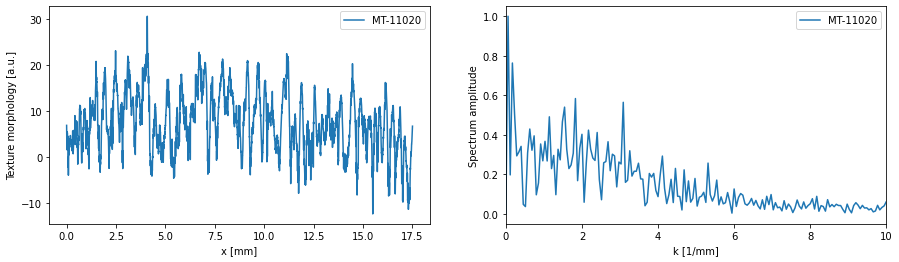

In [14]:
files = [f for f in files if '.ua2' in f]
# files = [f for f in files if 'Profil' in f]
print(files)

file = files[1]

filename = os.path.join(path, file)

print("loading file",filename)

line_length = 17.5 #mm
data = np.loadtxt(filename, skiprows=2)

profile = data
x = np.linspace(0,line_length, profile.size)

spectrum_profile = np.fft.fft(profile-np.mean(profile))

spectrum_spatial_freq = np.fft.fftfreq(spectrum_profile.size, d=np.diff(x)[0])

spectrum_texture = spectrum_profile
spectrum_profile = np.abs(spectrum_profile)

spectrum_profile = np.fft.fftshift(spectrum_profile)
spectrum_spatial_freq = np.fft.fftshift(spectrum_spatial_freq)


fig, ax = plt.subplots(1,2, figsize=(15,4))

plt.sca(ax[0])

plt.plot(x, profile, label=sample)
plt.xlabel("x [mm]")
plt.ylabel("Texture morphology [a.u.]")

plt.legend()
plt.sca(ax[1])

plt.plot(spectrum_spatial_freq, spectrum_profile/spectrum_profile.max(), label=sample)
plt.legend()

plt.xlabel("k [1/mm]")
plt.ylabel("Spectrum amplitude")
plt.xlim(0,10)
plt.savefig("%s_spectrum.png"%(sample))

['Pos01.ua2', 'Pos02.ua2', 'Pos03.ua2', 'Pos04.ua2', 'Pos05.ua2', 'Pos06.ua2']
loading file C:\Users\diogo\INL\ProTouch - Documents\Design\TactileSamples\Samples_PlateA\Day4\ABS\MT-11020\Pos02.ua2


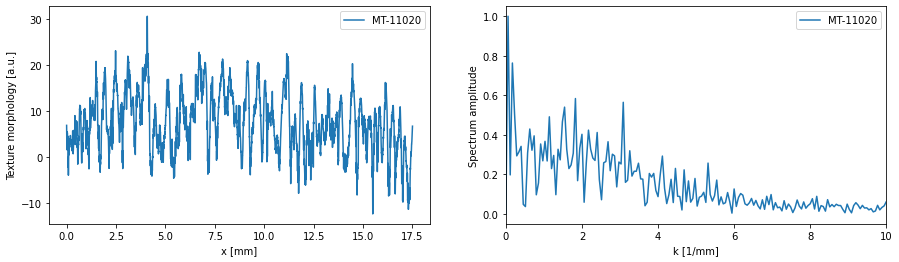

In [14]:





import os


path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day1"

sample ="MT-11020"
path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day4\\ABS\\MT-11050"
path = "C:\\Users\\diogo\\INL\\ProTouch - Documents\\Design\\TactileSamples\\Samples_PlateA\\Day4\\ABS\\%s"%(sample)

files = os.listdir(path)

files = [f for f in files if '.ua2' in f]
# files = [f for f in files if 'Profil' in f]
print(files)

file = files[1]

filename = os.path.join(path, file)

print("loading file",filename)

line_length = 17.5 #mm
data = np.loadtxt(filename, skiprows=2)

profile = data
x = np.linspace(0,line_length, profile.size)

spectrum_profile = np.fft.fft(profile-np.mean(profile))

spectrum_spatial_freq = np.fft.fftfreq(spectrum_profile.size, d=np.diff(x)[0])

spectrum_texture = spectrum_profile
spectrum_profile = np.abs(spectrum_profile)

spectrum_profile = np.fft.fftshift(spectrum_profile)
spectrum_spatial_freq = np.fft.fftshift(spectrum_spatial_freq)


fig, ax = plt.subplots(1,2, figsize=(15,4))

plt.sca(ax[0])

plt.plot(x, profile, label=sample)
plt.xlabel("x [mm]")
plt.ylabel("Texture morphology [a.u.]")

plt.legend()
plt.sca(ax[1])

plt.plot(spectrum_spatial_freq, spectrum_profile/spectrum_profile.max(), label=sample)
plt.legend()

plt.xlabel("k [1/mm]")
plt.ylabel("Spectrum amplitude")
plt.xlim(0,10)
plt.savefig("%s_spectrum.png"%(sample))
